### Dataset

In this homework, we will use the California Housing Prices from [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

Here's a wget-able [link](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv):

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
```

The goal of this homework is to create a regression model for predicting housing prices (column `'median_house_value'`).

In [283]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [284]:
# Descargando el dataset
url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv'

# Lectura del dataset
df = pd.read_csv(url)

# Grabando el dataset en local
df.to_csv('laptops.csv', index=False)

In [285]:
# Cargando el dataset desde carpeta local
df = pd.read_csv('laptops.csv')
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [286]:
df.shape

(2160, 12)

### Preparing the dataset 

First, we'll normalize the names of the columns:

```python
df.columns = df.columns.str.lower().str.replace(' ', '_')
```

Now, instead of `'Final Price'`, we have `'final_price'`.

Next, use only the following columns:

* `'ram'`,
* `'storage'`,
* `'screen'`,
* `'final_price'`


In [287]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [288]:
df.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [289]:
columnas = ['ram', 'storage', 'screen', 'final_price']
df = df[columnas]
df.head()

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01


### EDA

* Look at the `final_price` variable. Does it have a long tail? 

c:\Users\guill\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='final_price', ylabel='Count'>

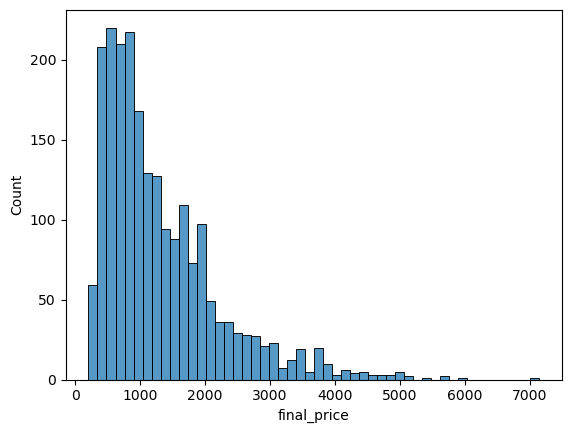

In [290]:
sns.histplot(df['final_price'], bins=50)

### Question 1

There's one column with missing values. What is it?

* `'ram'`
* `'storage'`
* `'screen'`    ---> **Correct**
* `'final_price'`

In [291]:
df.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

### Question 2

What's the median (50% percentile) for variable `'ram'`?

- 8
- 16    ---> **Correct**
- 24
- 32


In [292]:
df['ram'].median()

16.0

### Prepare and split the dataset

* Shuffle the dataset (the filtered one you created above), use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.

Use the same code as in the lectures



In [293]:
# Revisamos la longitud del dataframe. Esto nos dará un número escalar, solo uno (15_686).
n = len(df)

# Acá extraemos toda la secuencia de indices, desde el cero hasta llegar a la longitud del dataframe.
idx = np.arange(n)

# Aplicamos shuffle (revolver) para que el dataset no tenga predominancia de orden de ningún tipo.
np.random.seed(42)
np.random.shuffle(idx)

# División del dataset original en train/val/test
n_val   = int(n * 0.2)          # Validation de 20%
n_test  = int(n * 0.2)          # Test de 20%
n_train = (n - n_val - n_test)  # Train de 60%, con esta diferencia aseguramos valores enteros.

In [294]:
len(df), n_val + n_test + n_train

(2160, 2160)

In [295]:
n_train, n_val, n_test      # Estos son solo números, no es un dataset con valores.

(1296, 432, 432)

In [296]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

In [297]:
len(df_train), len(df_val), len(df_test)

(1296, 432, 432)

In [298]:
df_train.head()

,ram,storage,screen,final_price
2079,32,1000,15.6,1123.29
668,4,64,14.1,201.05
2073,32,1000,14.0,997.74
1113,16,512,13.3,1016.00
788,32,1000,16.0,2739.00


In [299]:
# Reset de indices
df_train    = df_train.reset_index(drop=True)
df_val      = df_val.reset_index(drop=True)
df_test     = df_test.reset_index(drop=True)

In [300]:
# Ya tenemos nuestros datasets, pero no olvidar que de ellos extraeremos la matriz X, pero también se encuentra incluida la variable target 'y' que en este caso es "msrp"
# Debemos extraer 'y' de cada uno de los datasets train, val & test

y_train = np.log1p(df_train['final_price'].values)  # No necesito los indices, solo los valores en un arreglo numpy. Se aplica logaritmo +1 para corregir la cola y normalizar la distribución.
y_val = np.log1p(df_val['final_price'].values)
y_test = np.log1p(df_test['final_price'].values)

In [301]:
del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

In [302]:
df_train.head()

,ram,storage,screen
0,32,1000,15.6
1,4,64,14.1
2,32,1000,14.0
3,16,512,13.3
4,32,1000,16.0


In [303]:
len(df_train), len(y_train)

(1296, 1296)

### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:

- With 0
- With mean
- Both are equally good



#### Opción 1: Reemplazar valores faltantes por ceros

In [304]:
# Opción 1: Reemplazar por ceros datos faltantes en columna 'screen'
df.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

In [305]:
base = ['ram', 'storage', 'screen']
X_train = df_train[base].fillna(0).values
X_val = df_val[base].fillna(0).values
X_test = df_train[base].fillna(0).values

X_train.shape

(1296, 3)

In [306]:
y_train.shape

(1296,)

## --- Todo lo de arriba está aprobado y correcto :)

---

In [308]:
def rmse(y, y_pred):
    se = (y - y_pred)**2
    mse = se.mean()
    return np.sqrt(mse)

### Regresion lineal en Vector form

In [307]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

#### Training a linear regression model

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

(25844.75405576679, array([ -16.08906468, -199.47254894,   -1.22802883]))

#### Regularization

array([[4.        , 4.        , 4.        ],
       [3.        , 5.        , 5.        ],
       [5.        , 1.        , 1.        ],
       [5.        , 4.        , 4.        ],
       [7.        , 5.        , 5.        ],
       [4.        , 5.        , 5.00000001]])

array([[140.        , 111.        , 111.00000004],
       [111.        , 108.        , 108.00000005],
       [111.00000004, 108.00000005, 108.0000001 ]])

array([[ 3.86409478e-02, -1.26839821e+05,  1.26839770e+05],
       [-1.26839767e+05,  2.88638033e+14, -2.88638033e+14],
       [ 1.26839727e+05, -2.88638033e+14,  2.88638033e+14]])

array([-1.93908876e-01, -3.61854400e+06,  3.61854712e+06])

array([[-3.33333356e-01,  3.33333339e-01,  3.33333339e-01],
       [ 3.33333339e-01, -5.00000008e+06,  4.99999991e+06],
       [ 3.33333339e-01,  4.99999991e+06, -5.00000008e+06]])

array([[ -0.33668908,   0.33501399,   0.33501399],
       [  0.33501399,  49.91590897, -50.08509104],
       [  0.33501399, -50.08509104,  49.91590897]])

0.428851636053407

---

In [159]:
X = df_train[base].values
y = y_train

# Añadir una columna de unos para el intercepto
ones = np.ones(X.shape[0])
X = np.column_stack([ones, X])

In [160]:
X

array([[   1. ,   32. , 1000. ,   15.6],
       [   1. ,    4. ,   64. ,   14.1],
       [   1. ,   32. , 1000. ,   14. ],
       ...,
       [   1. ,   16. ,  512. ,   15.6],
       [   1. ,   16. ,  512. ,   14. ],
       [   1. ,   16. ,  512. ,   14. ]])

In [161]:
# Calcular la ecuación normal para encontrar los pesos (w)
XTX = X.T.dot(X)
XTX_inv = np.linalg.inv(XTX)
w_full = XTX_inv.dot(X.T).dot(y)

In [162]:
w0 = w_full[0]
w = w_full[1:]

In [163]:
w0, w

(nan, array([nan, nan, nan]))

In [98]:
def train_linear_regression(X, y):      # Función que determina w0 y wi (todos los pesos) basandose en la matriz X y target y
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [99]:
train_linear_regression(X, y)

LinAlgError: Singular matrix

In [151]:
w0, w = train_linear_regression(X_train, y_train)   

In [152]:
y_pred = w0 + X_train.dot(w)
y_pred

array([7.65966079, 6.35973416, 7.71809133, ..., 6.91648826, 6.9749188 ,
       6.9749188 ])

In [153]:
y_pred = w0 + X_val.dot(w)
y_pred

array([7.64505316, 6.91648826, 6.81126471, 6.61001529, 6.70604115,
       6.9749188 , 7.17668414, 6.91648826, 6.53697712, 7.59757835,
       6.79003505, 7.22415895, 6.70604115, 7.00048216, 6.75654681,
       6.91648826, 6.35973416, 6.53697712, 7.29719712, 6.53697712,
       6.53697712, 7.23876658, 6.59540765, 6.53697712, 7.59757835,
       6.53697712, 6.59540765, 7.23876658, 7.29719712, 6.59540765,
       7.59757835, 7.64505316, 6.62097101, 6.70604115, 6.91648826,
       7.88456534, 6.91648826, 7.65966079, 7.22415895, 7.23876658,
       7.92853843, 7.17668414, 6.91648826, 6.53697712, 6.91648826,
       6.64395871, 7.23876658, 7.64505316, 6.9749188 , 7.21685513,
       6.70604115, 6.53697712, 6.91648826, 6.9749188 , 6.70604115,
       6.70604115, 6.91648826, 6.91648826, 7.29719712, 6.9749188 ,
       7.65966079, 6.70604115, 6.9749188 , 6.91648826, 6.76447169,
       7.32276048, 6.59540765, 6.42989887, 6.81126471, 6.53697712,
       6.53697712, 6.53697712, 7.23876658, 6.91648826, 6.70604

#### Opción 2: Reemplazar valores faltantes por la media

In [106]:
# Opción 2: Reemplazar con la media datos faltantes en columna 'screen'

### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.01, 0.1, 1, 5, 10, 100]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

Options:

- 0
- 0.01
- 1
- 10
- 100


### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

What's the value of std?

- 19.176
- 29.176
- 39.176
- 49.176

> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.


### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

Options:

- 598.60
- 608.60
- 618.60
- 628.60

## Submit the results

* Submit your results here: https://courses.datatalks.club/ml-zoomcamp-2024/homework/hw02
* If your answer doesn't match options exactly, select the closest one
